## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings 
filterwarnings('ignore')

## Loading Dataset

In [5]:
df = pd.read_csv('Border_Crossing_Entry_Data.csv')

In [6]:
df.head(10)

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)
5,Whitlash,Montana,3321,US-Canada Border,Jan 2024,Personal Vehicles,29,48.997,-111.258,POINT (-111.257916 48.99725)
6,Ysleta,Texas,2401,US-Mexico Border,Jan 2024,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.335449846028 31.6731261376859)
7,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Trucks,837,48.999,-95.377,POINT (-95.376555 48.999)
8,Wildhorse,Montana,3323,US-Canada Border,Jan 2024,Trucks,20,48.999,-110.215,POINT (-110.215083 48.999361)
9,Wildhorse,Montana,3323,US-Canada Border,Jan 2024,Personal Vehicle Passengers,965,48.999,-110.215,POINT (-110.215083 48.999361)


Value (Number of Crossings) → 
Represents the number of trucks, buses, personal vehicles, or pedestrians crossing the border.
Can predict traffic volume at a port based on factors like location, port type, and time.
Helps in forecasting future traffic trends at various ports.

Independent Variables :
You can use the following features to predict the number of crossings (Value):

Port Name (Categorical) – Some ports have higher traffic than others.

State (Categorical) – Some states have more border crossings.

Port Code (Numerical) – Can be used as a unique identifier.

Border (Categorical) – US-Canada vs. US-Mexico, as crossing patterns differ.

Date (Time-based) – To capture seasonal trends in traffic.

Measure (Categorical) – Type of crossing (trucks, buses, pedestrians, etc.).

Latitude & Longitude (Numerical) – Location-based impact.

## EDA and Data Preprocessing

In [11]:
df.shape

(398658, 10)

In [13]:
df.describe()

,Port Code,Value,Latitude,Longitude
count,398658.000000,3.986580e+05,398658.000000,398658.000000
mean,2446.098924,2.893694e+04,43.968759,-99.721697
std,1204.251516,1.495450e+05,8.152557,18.258660
min,101.000000,0.000000e+00,25.952000,-141.001000
25%,2304.000000,0.000000e+00,42.999000,-114.728000
50%,3012.000000,1.470000e+02,48.122000,-101.628000
75%,3401.000000,3.021000e+03,49.000000,-84.361000
max,3814.000000,4.447374e+06,62.615000,-66.980000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398658 entries, 0 to 398657
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  398658 non-null  object 
 1   State      398658 non-null  object 
 2   Port Code  398658 non-null  int64  
 3   Border     398658 non-null  object 
 4   Date       398658 non-null  object 
 5   Measure    398658 non-null  object 
 6   Value      398658 non-null  int64  
 7   Latitude   398658 non-null  float64
 8   Longitude  398658 non-null  float64
 9   Point      398658 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.4+ MB


In [17]:
df.describe(include = 'object')

,Port Name,State,Border,Date,Measure,Point
count,398658,398658,398658,398658,398658,398658
unique,116,14,2,349,12,116
top,Eastport,North Dakota,US-Canada Border,Oct 2010,Personal Vehicles,POINT (-115.388018 32.673389)
freq,6727,64259,304619,1356,37688,7409


In [19]:
df[df.duplicated()]

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
45041,Del Rio,Texas,2302,US-Mexico Border,Jun 2019,Personal Vehicles,123068,29.327,-100.928,POINT (-100.927612 29.326784)
47260,Santa Teresa,New Mexico,2408,US-Mexico Border,Jun 2019,Personal Vehicles,50672,31.784,-106.679,POINT (-106.679437 31.783939)
48943,Del Rio,Texas,2302,US-Mexico Border,Jun 2019,Personal Vehicle Passengers,238721,29.327,-100.928,POINT (-100.927612 29.326784)
49137,Fort Kent,Maine,110,US-Canada Border,Jun 2019,Personal Vehicle Passengers,14056,47.249,-68.604,POINT (-68.603918 47.249206)
51065,Roma,Texas,2310,US-Mexico Border,Jun 2019,Personal Vehicles,54953,26.404,-99.019,POINT (-99.018981 26.403928)
51508,Fort Kent,Maine,110,US-Canada Border,Jun 2019,Personal Vehicles,9615,47.249,-68.604,POINT (-68.603918 47.249206)
52195,Roma,Texas,2310,US-Mexico Border,Jun 2019,Personal Vehicle Passengers,104640,26.404,-99.019,POINT (-99.018981 26.403928)
55338,Detroit,Michigan,3801,US-Canada Border,Jun 2019,Personal Vehicle Passengers,599521,42.332,-83.048,POINT (-83.047924 42.331685)
55977,Detroit,Michigan,3801,US-Canada Border,Jun 2019,Personal Vehicles,351889,42.332,-83.048,POINT (-83.047924 42.331685)
56054,Santa Teresa,New Mexico,2408,US-Mexico Border,Jun 2019,Personal Vehicle Passengers,110576,31.784,-106.679,POINT (-106.679437 31.783939)


In [21]:
df.drop_duplicates(inplace = True)

In [23]:
df[df.duplicated()]

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point


In [25]:
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
Point        0
dtype: int64

<Axes: >

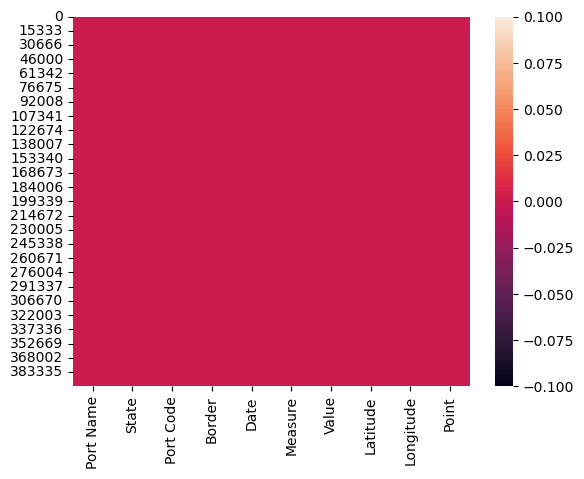

In [27]:
sns.heatmap(df.isnull())

In [28]:
df.Value.describe()

count    3.986480e+05
mean     2.893351e+04
std      1.495427e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.470000e+02
75%      3.020000e+03
max      4.447374e+06
Name: Value, dtype: float64

<Axes: xlabel='Value'>

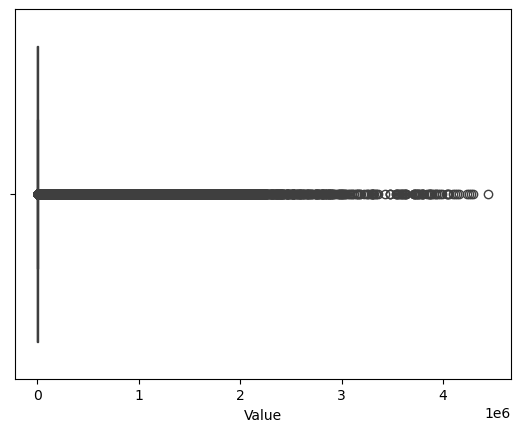

In [29]:
sns.boxplot(x=df.Value)

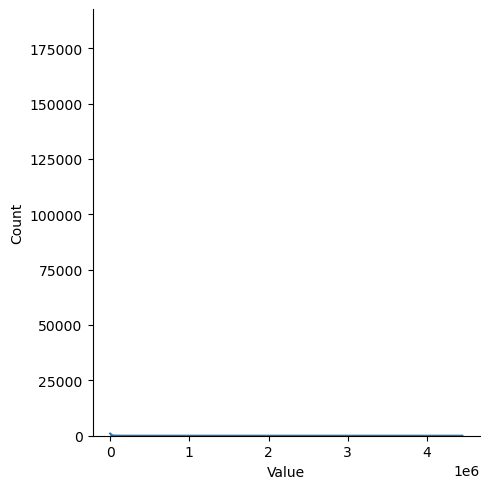

In [39]:
sns.displot(df.Value,kde=True)

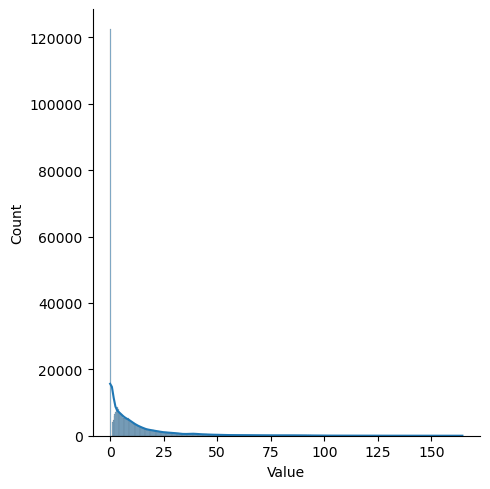

In [40]:
sns.displot(np.cbrt(df.Value),kde=True)

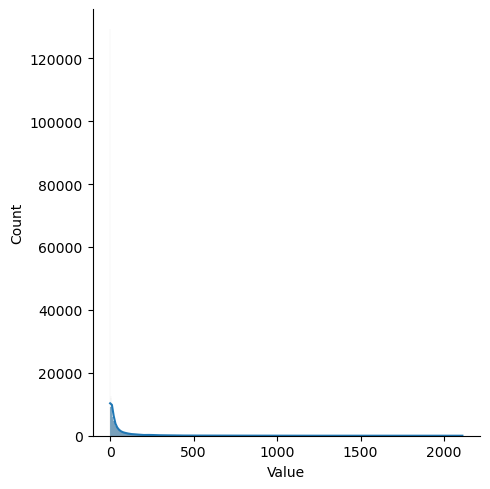

In [41]:
sns.displot(np.sqrt(df.Value),kde=True)

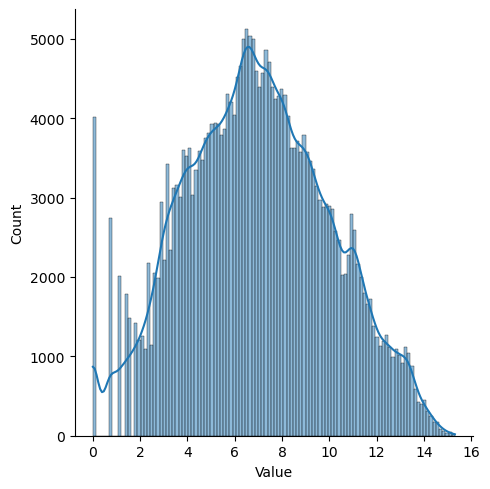

In [42]:
sns.displot(np.log(df.Value),kde=True)

In [43]:
np.log(df.Value).describe()

count    3.986480e+05
mean             -inf
std               NaN
min              -inf
25%               NaN
50%      4.990433e+00
75%      8.013012e+00
max      1.530782e+01
Name: Value, dtype: float64

(array([3.91544e+05, 4.67800e+03, 1.27900e+03, 5.92000e+02, 2.85000e+02,
        1.17000e+02, 7.00000e+01, 3.00000e+01, 4.00000e+01, 1.30000e+01]),
 array([      0. ,  444737.4,  889474.8, 1334212.2, 1778949.6, 2223687. ,
        2668424.4, 3113161.8, 3557899.2, 4002636.6, 4447374. ]),
 <BarContainer object of 10 artists>)

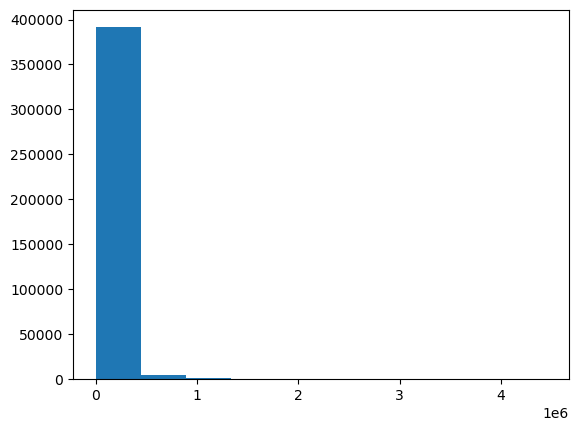

In [49]:
plt.hist(df.Value)

In [51]:
df.head(2)

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)


In [53]:
df.groupby(df['Port Name'])['Value'].value_counts()

Port Name  Value 
Alcan      0         1207
           1           58
           3           32
           2           28
           4           28
                     ... 
Ysleta     533473       1
           539970       1
           549464       1
           572703       1
           592477       1
Name: count, Length: 179021, dtype: int64

In [55]:
df.groupby(df['Port Name'])['Value'].mean()

Port Name
Alcan               1377.500558
Alexandria Bay     19666.928729
Algonac             4079.580952
Ambrose               68.486586
Anacortes            825.206930
                      ...      
Whitetail             61.763889
Whitlash              22.778556
Wildhorse            384.030279
Willow Creek          98.104928
Ysleta            147672.400568
Name: Value, Length: 116, dtype: float64

In [57]:
df['Port Name'].nunique()

116

In [59]:
df.groupby(df['Border'])['Value'].mean()

Border
US-Canada Border     9987.986872
US-Mexico Border    90306.543416
Name: Value, dtype: float64

In [61]:
df['Border'].nunique()

2

<Axes: xlabel='Border', ylabel='count'>

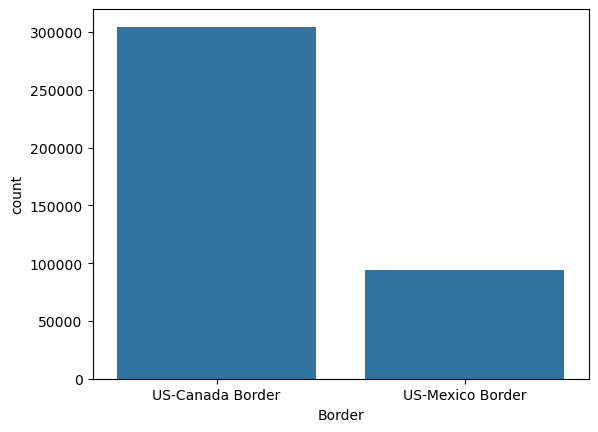

In [63]:
sns.countplot(x=df.Border)

<Axes: xlabel='State', ylabel='count'>

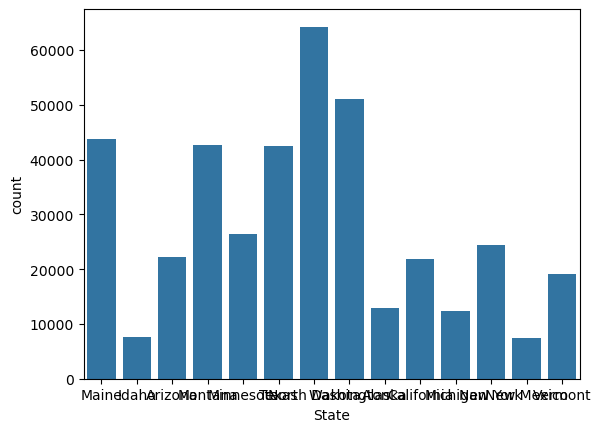

In [65]:
sns.countplot(x=df['State'],width=0.8,stat = 'count')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, 'Oct 2004'),
  Text(0.0, 0, 'Apr 1996'),
  Text(50.0, 0, 'Aug 2017'),
  Text(100.0, 0, 'Feb 2009'),
  Text(150.0, 0, 'Jul 2000'),
  Text(200.0, 0, 'Jun 2021'),
  Text(250.0, 0, 'May 2013'),
  Text(300.0, 0, 'Oct 2005'),
  Text(350.0, 0, ''),
  Text(400.0, 0, '')])

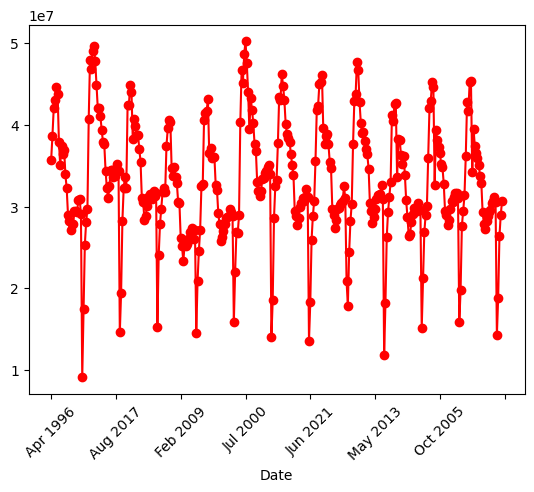

In [66]:
df.groupby('Date')['Value'].sum().plot(kind='line', marker='o', color='red')
plt.xticks(rotation=45)

<Axes: xlabel='Date', ylabel='Value'>

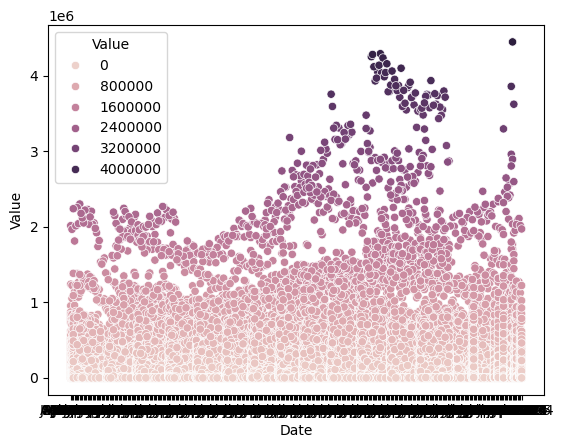

In [69]:
sns.scatterplot(y='Value',x='Date',data = df,hue = 'Value')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, 'Oct 2004'),
  Text(0.0, 0, 'Apr 1996'),
  Text(50.0, 0, 'Aug 2017'),
  Text(100.0, 0, 'Feb 2009'),
  Text(150.0, 0, 'Jul 2000'),
  Text(200.0, 0, 'Jun 2021'),
  Text(250.0, 0, 'May 2013'),
  Text(300.0, 0, 'Oct 2005'),
  Text(350.0, 0, ''),
  Text(400.0, 0, '')])

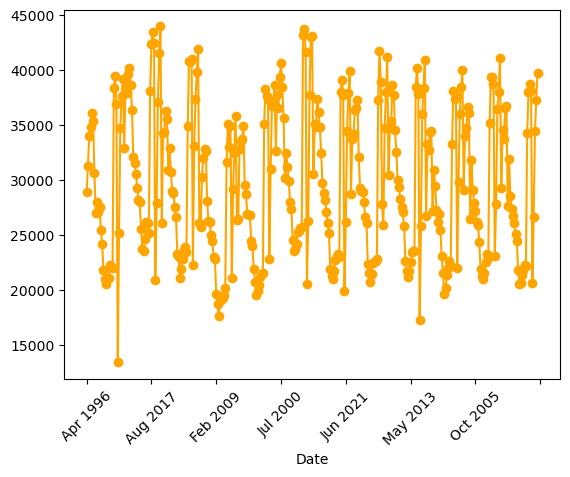

In [70]:
df.groupby('Date')['Value'].mean().plot(kind='line', marker='o', color='orange')
plt.xticks(rotation=45)

In [71]:
df.groupby('Measure')['Value'].sum()

Measure
Bus Passengers                  157258319
Buses                             9394820
Pedestrians                    1255581540
Personal Vehicle Passengers    6322657524
Personal Vehicles              3046464721
Rail Containers Empty            29235133
Rail Containers Loaded           51120669
Train Passengers                  7212997
Trains                            1086718
Truck Containers Empty           84679926
Truck Containers Loaded         242824790
Trucks                          326768661
Name: Value, dtype: int64

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, 'Truck Containers Loaded'),
  Text(0.0, 0, 'Bus Passengers'),
  Text(2.0, 0, 'Pedestrians'),
  Text(4.0, 0, 'Personal Vehicles'),
  Text(6.0, 0, 'Rail Containers Loaded'),
  Text(8.0, 0, 'Trains'),
  Text(10.0, 0, 'Truck Containers Loaded'),
  Text(12.0, 0, '')])

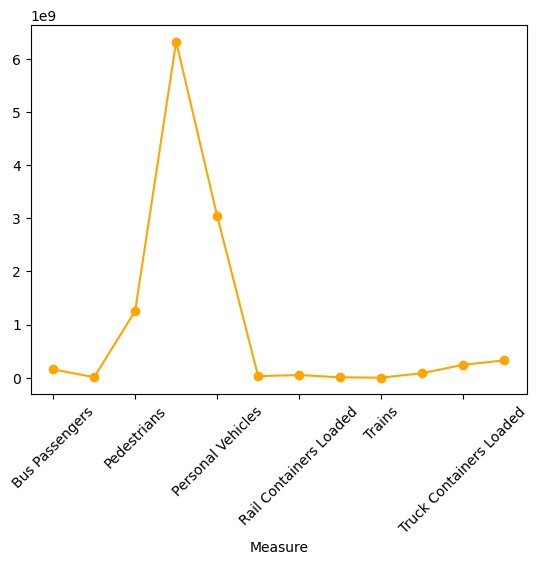

In [72]:
df.groupby('Measure')['Value'].sum().plot(kind='line', marker='o', color='orange')
plt.xticks(rotation=45)

In [77]:
df.groupby('Measure')['Value'].mean()

Measure
Bus Passengers                   4974.325267
Buses                             297.003667
Pedestrians                     38545.512986
Personal Vehicle Passengers    167896.795475
Personal Vehicles               80844.537882
Rail Containers Empty             981.538795
Rail Containers Loaded           1721.872377
Train Passengers                  246.261420
Trains                             36.458483
Truck Containers Empty           2325.349462
Truck Containers Loaded          6762.979808
Trucks                           8929.325345
Name: Value, dtype: float64

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, 'Truck Containers Loaded'),
  Text(0.0, 0, 'Bus Passengers'),
  Text(2.0, 0, 'Pedestrians'),
  Text(4.0, 0, 'Personal Vehicles'),
  Text(6.0, 0, 'Rail Containers Loaded'),
  Text(8.0, 0, 'Trains'),
  Text(10.0, 0, 'Truck Containers Loaded'),
  Text(12.0, 0, '')])

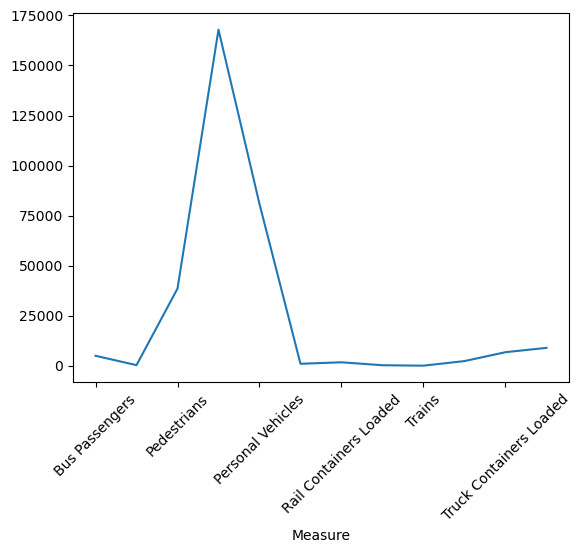

In [79]:
df.groupby('Measure')['Value'].mean().plot()
plt.xticks(rotation=45)

In [81]:
df.groupby([df['Border'],df['Measure']])['Value'].sum()

Border            Measure                    
US-Canada Border  Bus Passengers                   78560957
                  Buses                             3296427
                  Pedestrians                      14208773
                  Personal Vehicle Passengers    1711139106
                  Personal Vehicles               826778501
                  Rail Containers Empty            16916496
                  Rail Containers Loaded           40281281
                  Train Passengers                  6858734
                  Trains                             821066
                  Truck Containers Empty           32428939
                  Truck Containers Loaded         136790674
                  Trucks                          174409667
US-Mexico Border  Bus Passengers                   78697362
                  Buses                             6098393
                  Pedestrians                    1241372767
                  Personal Vehicle Passengers    46115

In [83]:
df['Date'].nunique()

349

In [85]:
df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Latitude', 'Longitude', 'Point'],
      dtype='object')

In [87]:
df1 = df.copy(deep = True)

In [89]:
df.describe().corr()

,Port Code,Value,Latitude,Longitude
Port Code,1.000000,-0.055685,0.999964,0.999964
Value,-0.055685,1.000000,-0.059874,-0.059876
Latitude,0.999964,-0.059874,1.000000,1.000000
Longitude,0.999964,-0.059876,1.000000,1.000000


<Axes: >

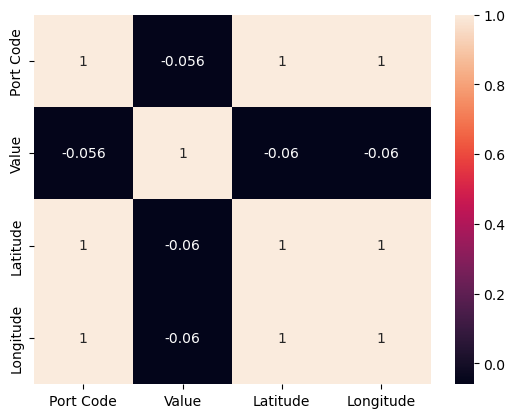

In [91]:
sns.heatmap(df.describe().corr(),annot = True)

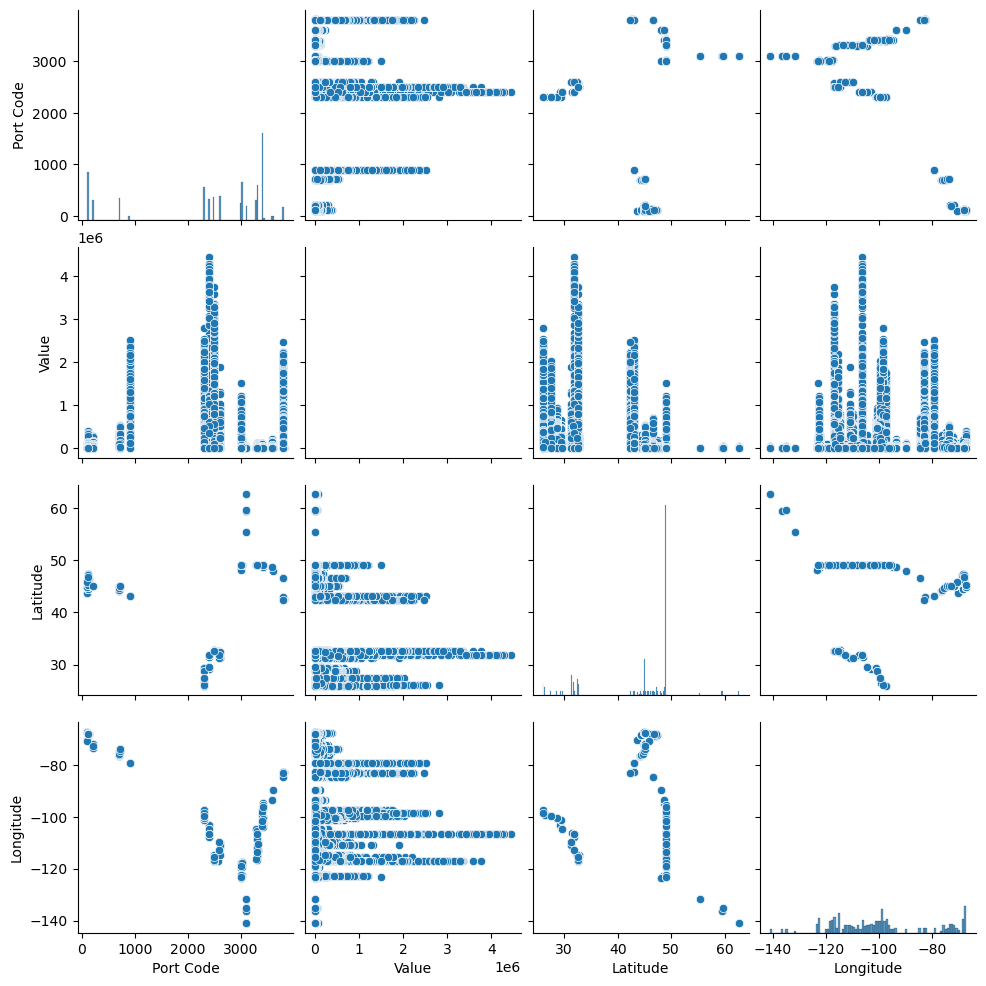

In [93]:
sns.pairplot(df)

In [94]:
df.drop(columns = 'Port Name',inplace = True)

In [95]:
df.drop(columns = 'Port Code',inplace = True)

In [96]:
df.drop(columns = 'Point',inplace = True)

In [101]:
df.Value = np.log(df.Value)

In [104]:
df2 = df.copy(deep = True)

In [107]:
df_o =df1.copy(deep = True)

In [109]:
df1.drop(columns = ['Port Name','Port Code','Point'],inplace=True)

In [111]:
df1.head(1)

,State,Border,Date,Measure,Value,Latitude,Longitude
0,Maine,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397


## Encoding

In [115]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [116]:
encoder = LabelEncoder()

In [117]:
encoder

LabelEncoder()

In [118]:
df['State'] = encoder.fit_transform(df['State'])

In [122]:
df['Measure'] = encoder.fit_transform(df['Measure'])

In [123]:
df['Border'] = encoder.fit_transform(df['Border'])

In [125]:
df['Date'] = encoder.fit_transform(df['Date'])

In [130]:
df1['State'] = encoder.fit_transform(df1['State'])

In [131]:
df1['Measure'] = encoder.fit_transform(df1['Measure'])

In [133]:
df1['Border'] = encoder.fit_transform(df1['Border'])

In [134]:
df1['Date'] = encoder.fit_transform(df1['Date'])

## Spliting Dependent and independent variale

In [139]:
X = df1.drop(columns = 'Value')
y = df1.Value

In [141]:
X

,State,Border,Date,Measure,Latitude,Longitude
0,4,0,144,11,45.806,-70.397
1,3,0,28,11,49.000,-116.499
2,1,1,28,1,32.485,-114.782
3,7,0,144,2,49.000,-109.731
4,6,0,144,3,48.999,-95.377
...,...,...,...,...,...,...
398653,7,0,145,3,49.000,-106.378
398654,1,1,145,11,31.880,-112.817
398655,4,0,145,11,47.160,-67.931
398656,4,0,145,10,46.765,-67.789


In [143]:
y

0         6556
1           98
2           10
3            2
4         9266
          ... 
398653     306
398654      58
398655    1166
398656     114
398657      33
Name: Value, Length: 398648, dtype: int64

## Spliting testing and training

In [146]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state = 0)

In [148]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(318918, 6) (79730, 6) (318918,) (79730,)


## Model Building

## Linear Regression

In [152]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [153]:
lr

LinearRegression()

In [156]:
lr.fit(X_train,y_train)

LinearRegression()

In [158]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [160]:
from sklearn.metrics import r2_score

In [162]:
r2_score(y_train,y_train_pred)

0.06635438525083703

In [164]:
r2_score(y_test,y_test_pred)

0.06668922953071232

## Decession Tree

In [168]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [170]:
dt

DecisionTreeRegressor()

In [172]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [173]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [176]:
r2_score(y_train,y_train_pred)

0.9909259608440432

In [178]:
r2_score(y_test,y_test_pred)

0.8841697496747015

## Random Forest

In [180]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500)

In [182]:
rf

RandomForestRegressor(n_estimators=500)

In [184]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [185]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [186]:
r2_score(y_train,y_train_pred)

0.9829603052137841

In [187]:
r2_score(y_test,y_test_pred)

0.9237019550968187

In [223]:
rf1 = RandomForestRegressor(n_estimators=500,max_depth=8)

In [225]:
rf1

RandomForestRegressor(max_depth=8, n_estimators=500)

In [211]:
rf1.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=500)

In [212]:
y_train_pred = rf1.predict(X_train)
y_test_pred = rf1.predict(X_test)

In [213]:
r2_score(y_train,y_train_pred)

0.7851273386409142

In [214]:
r2_score(y_test,y_test_pred)

0.7891472181562584

In [229]:
rf2 = RandomForestRegressor(n_estimators=600,max_depth=10)

In [231]:
rf2

RandomForestRegressor(max_depth=10, n_estimators=600)

In [233]:
rf2.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=600)

In [234]:
y_train_pred = rf2.predict(X_train)
y_test_pred = rf2.predict(X_test)

In [235]:
r2_score(y_train,y_train_pred)

0.851221948843384

In [236]:
r2_score(y_test,y_test_pred)

0.8524582224195819

In [255]:
rf3 = RandomForestRegressor(n_estimators=600,max_depth=11)

In [257]:
rf3

RandomForestRegressor(max_depth=11, n_estimators=600)

In [259]:
rf3.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, n_estimators=600)

In [260]:
y_train_pred = rf3.predict(X_train)
y_test_pred = rf3.predict(X_test)

In [261]:
r2_score(y_train,y_train_pred)

0.8748446600074823

In [262]:
r2_score(y_test,y_test_pred)

0.8719018868235384

## OLS

In [267]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [268]:
df.columns

Index(['State', 'Border', 'Date', 'Measure', 'Value', 'Latitude', 'Longitude'], dtype='object')

In [269]:
ols1 = smf.ols(formula = " Value ~ State + Border + Date + Measure + Latitude + Longitude ",data = df1).fit()

In [270]:
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4727.
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:28:10   Log-Likelihood:            -5.3020e+06
No. Observations:              398648   AIC:                         1.060e+07
Df Residuals:                  398641   BIC:                         1.060e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.309e+05   5786.438     39.909      0.000     2.2e+05    2.42e+05
State      -1154.5903     75.475    -15.298      0.000   -1302.520   -1006.661
Border     -1.253e+04   2960.050     -4.232      0.000   -1.83e+04   -6725.928
Date          -1.9412      2.275     -0.853      0.394      -6.401       2.518
Measure    -4593.7555     65.549    -70.082      0.000   -4722.229   -4465.282
Latitude   -4773.7169    147.001    -32.474      0.000   -5061.835   -4485.599
Longitude   -457.7789     23.000    -19.904      0.000    -502.858    -412.700
==============================================================================
Omnibus:                   645815.092   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        500426028.971
Skew:                          10.759   Prob(JB):                         0.00
Kurtosis:                     175.234   Cond. No.                     6.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [271]:
ols2 = smf.ols(formula = " Value ~ State + Border +  Measure + Latitude + Longitude ",data = df1).fit()

In [272]:
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     5673.
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:28:11   Log-Likelihood:            -5.3020e+06
No. Observations:              398648   AIC:                         1.060e+07
Df Residuals:                  398642   BIC:                         1.060e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.306e+05   5772.305     39.947      0.000    2.19e+05    2.42e+05
State      -1154.5458     75.475    -15.297      0.000   -1302.475   -1006.616
Border     -1.252e+04   2960.045     -4.231      0.000   -1.83e+04   -6721.777
Measure    -4593.8297     65.549    -70.083      0.000   -4722.303   -4465.356
Latitude   -4773.4936    147.001    -32.473      0.000   -5061.611   -4485.376
Longitude   -457.7677     23.000    -19.903      0.000    -502.846    -412.689
==============================================================================
Omnibus:                   645819.864   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        500449060.536
Skew:                          10.759   Prob(JB):                         0.00
Kurtosis:                     175.238   Cond. No.                     3.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [274]:
df.head(2)

,State,Border,Date,Measure,Value,Latitude,Longitude
0,4,0,144,11,8.788136,45.806,-70.397
1,3,0,28,11,4.584967,49.000,-116.499
